In [1]:
import numpy as np

In [2]:
#Задача 1
a = np.random.random((10,3))
a[np.arange(10), np.absolute(a-0.5).argmin(axis=1)]

array([0.41626182, 0.46675871, 0.23094126, 0.52551364, 0.32564468,
       0.51018577, 0.59992994, 0.89212236, 0.66445713, 0.22769674])

In [3]:
#Задача 2
b = np.random.random((6,6))
b.sum(axis=1)/b.min(axis=0)

array([107.39242755,  96.10867175,  45.34200059,  26.05987999,
         8.44664422,  60.76307875])

In [4]:
#Задача 3
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
mask = x == 0
x[1:][mask[:-1]].max()

5

In [5]:
#Задача 4
x = np.ones(10) 
print(x)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(np.bincount(i))
np.pad(np.bincount(i), (0, len(x) - len(np.bincount(i))), 'constant') + x

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1 1 1 1 0 3 0 0 1]


array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

In [6]:
#Задача 5
n = 4
a = np.arange(n * n).reshape(n, n)
dict((i, list(np.diagonal(a[:, ::-1], 3 - i))) for i in range(2 * n - 1))

{0: [0],
 1: [1, 4],
 2: [2, 5, 8],
 3: [3, 6, 9, 12],
 4: [7, 10, 13],
 5: [11, 14],
 6: [15]}

# K-means
## Задача 6


In [19]:
#Get dataset on old faithful geyser eruptions
data = np.genfromtxt('dataset-44970.csv', delimiter=',', skip_header=1)

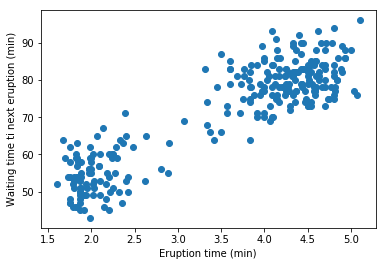

In [20]:
#Visualize data
import matplotlib.pyplot as plt

plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')
plt.show()

In [21]:
#Standardize data to zero mean and unit st
data = data - data.mean(axis=0)
data = data/data.std(axis=0)

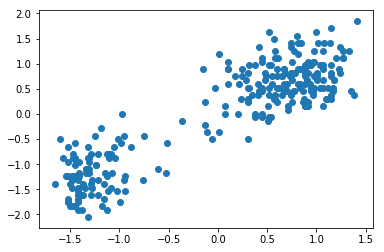

In [22]:
#Plot standardized data
plt.scatter(*data.T)
plt.show()

In [23]:
def kmeans(A, k, iters=20, tresh=1e-05):
    N = A.shape[0] 
    m = A.shape[1] 
    centroids = A[:k, :]  
    A = np.expand_dims(A, axis = 1) 
    centroids1 = np.zeros((k, m)) 
    i = 0
    distortion = m * N * k * np.max(A) ** 2
    distortion1 = 0 
    while distortion1 - distortion > tresh or i < iters:
        distortion1 = distortion
        centroids1 = centroids
        dif = A - centroids
        numcen = np.argmin((dif ** 2).sum(axis = 2), axis = 1) 
        C = np.zeros(N * m * k).reshape(N, k, m)
        C[np.arange(N), numcen, :] = dif[np.arange(N),  numcen, :] / np.bincount(numcen)[numcen].reshape(N, 1)
        centroids = centroids1 + np.squeeze(C.sum(axis = 0))        
        
        numcen = np.argmin(((A - centroids) ** 2).sum(axis = 2), axis = 1)
        C = np.zeros(N * m * k).reshape(N, k, m)
        C[np.arange(N), numcen, :] = (A - centroids)[np.arange(N),  numcen, :]
        distortion = np.sqrt((C ** 2).sum(axis = 2)).sum(axis = 1).mean()         
        i = i + 1
    return centroids, distortion
    

In [24]:
centroids = kmeans(data, 2)

In [30]:
labels = []
for i in range(data.shape[0]):
    if np.linalg.norm(data[i]-centroids[0][0])>np.linalg.norm(data[i]-centroids[0][1]):
        labels.append(1)
    else: 
        labels.append(0)

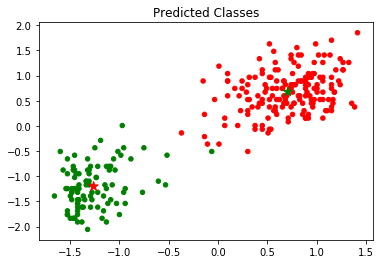

In [31]:
# Plot predicted classes. Circles show data points distribution, stars show centroids location
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*kmeans(data, 2)[0].T, c=["green", "red"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()